In [13]:
import pandas as pd

In [14]:
matrix = "cbuckle"
df = pd.read_csv(f"data/{matrix}_overhead_analysis.csv")
df.head()

,mat_name,errorfree_iterations,tol,maxiter,error_pos,error_iter,solve_iterations,final_relres,did_converge,realtime_s,pos_2norm,n_protections,n_rows,slowdown
0,cbuckle.mat,341,0.000001,34100,1135,83,352,9.973114e-07,True,0.234578,485.237722,0,13681,1.032258
1,cbuckle.mat,341,0.000001,34100,1135,83,352,9.973114e-07,True,0.232478,485.237722,2348194,13681,1.032258
2,cbuckle.mat,341,0.000001,34100,11385,42,343,9.614078e-07,True,0.229620,47.132326,0,13681,1.005865
3,cbuckle.mat,341,0.000001,34100,11385,42,343,9.614078e-07,True,0.243494,47.132326,2348194,13681,1.005865
4,cbuckle.mat,341,0.000001,34100,1345,44,351,9.596970e-07,True,0.235188,528.571697,0,13681,1.029326


count    1000.000000
mean       10.826504
std        21.228636
min         0.912023
25%         1.043988
50%         1.306452
75%         7.306452
max        99.997067
Name: slowdown, dtype: float64


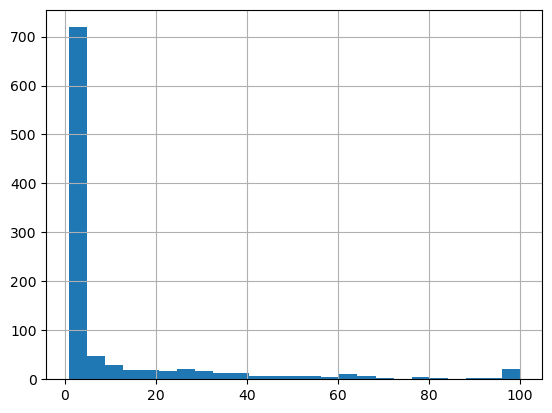

In [15]:
df_nonprot = df[df["n_protections"] == 0]
print(df_nonprot["slowdown"].describe())
df_nonprot["slowdown"].hist(bins=25);

count    1000.000000
mean        5.388672
std        15.144520
min         0.926686
25%         1.000000
50%         1.000000
75%         1.296921
max        99.997067
Name: slowdown, dtype: float64


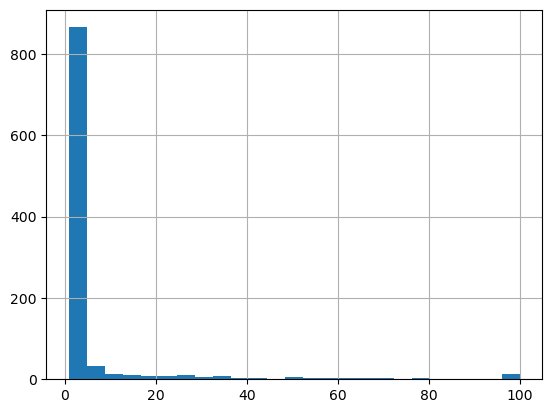

In [16]:
df_prot = df[df["n_protections"] != 0]
print(df_prot["slowdown"].describe())
df_prot["slowdown"].hist(bins=25);

count    1000.000000
mean        9.826504
std        21.228636
min        -0.087977
25%         0.043988
50%         0.306452
75%         6.306452
max        98.997067
dtype: float64


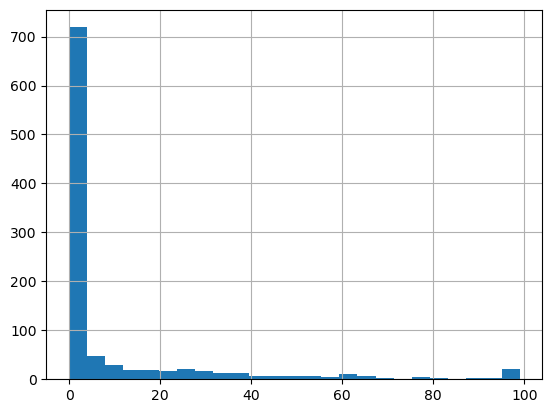

In [17]:
ohc = df_nonprot["solve_iterations"] * df_nonprot["n_rows"] + + df_nonprot["n_protections"]
efc = df_nonprot["errorfree_iterations"] * df_nonprot["n_rows"]

nonprot_overhead = (ohc - efc) / efc
print(nonprot_overhead.describe())
nonprot_overhead.hist(bins=25);

count    1000.000000
mean        4.892012
std        15.144520
min         0.430027
25%         0.503340
50%         0.503340
75%         0.800261
max        99.500408
dtype: float64


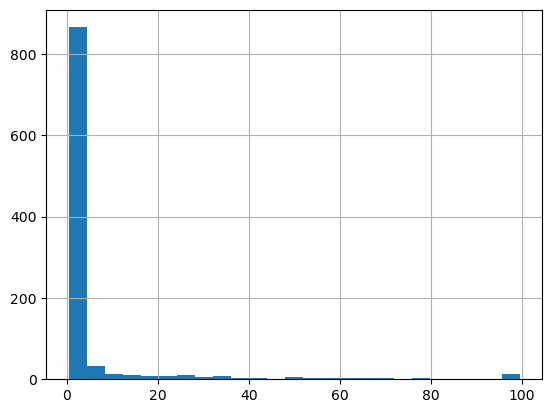

In [18]:
ohc = df_prot["solve_iterations"] * df_prot["n_rows"] + + df_prot["n_protections"]
efc = df_prot["errorfree_iterations"] * df_prot["n_rows"]

prot_overhead = (ohc - efc) / efc
print(prot_overhead.describe())
prot_overhead.hist(bins=25);